In [156]:
import fitz  # PyMuPDF

# Load your trained CNN model
#model = torch.trainedmodel.com

# Load the PDF
doc = fitz.open('planering.pdf')
#Takes the first page
page = doc[0]
# Gets all the drawings out of the pfd, lines, squares etc and stores them as a list of dics
paths = page.get_drawings()
paths

[{'items': [('re',
    Rect(407.80999755859375, 64.32000732421875, 497.2340087890625, 71.280029296875),
    1)],
  'type': 'f',
  'even_odd': True,
  'fill_opacity': 1.0,
  'fill': (1.0, 1.0, 0.0),
  'rect': Rect(407.80999755859375, 64.32000732421875, 497.2340087890625, 71.280029296875),
  'seqno': 0,
  'layer': None,
  'closePath': None,
  'color': None,
  'width': None,
  'lineCap': None,
  'lineJoin': None,
  'dashes': None,
  'stroke_opacity': None},
 {'items': [('re',
    Rect(154.82000732421875, 84.1199951171875, 184.70001220703125, 92.04000854492188),
    1)],
  'type': 'f',
  'even_odd': True,
  'fill_opacity': 1.0,
  'fill': (0.722000002861023, 0.800000011920929, 0.8939999938011169),
  'rect': Rect(154.82000732421875, 84.1199951171875, 184.70001220703125, 92.04000854492188),
  'seqno': 1,
  'layer': None,
  'closePath': None,
  'color': None,
  'width': None,
  'lineCap': None,
  'lineJoin': None,
  'dashes': None,
  'stroke_opacity': None},
 {'items': [('re',
    Rect(199.460

In [157]:
filtered_paths = []

# Set a minimum height threshold for a rectangle to be considered
min_height = 0.4  # Adjust this value according to your data

for path in paths:
    for item in path["items"]:
        if item[0] == "re":  # If it's a rectangle
            rect = item[1]
            if isinstance(rect, fitz.Rect):  # If the second item is a Rect object
                height = rect.height
                if height >= min_height:  # If the rectangle is not a separator line
                    filtered_paths.append(path)


print(f"Number of paths after filtering: {len(filtered_paths)}")


Number of paths after filtering: 973


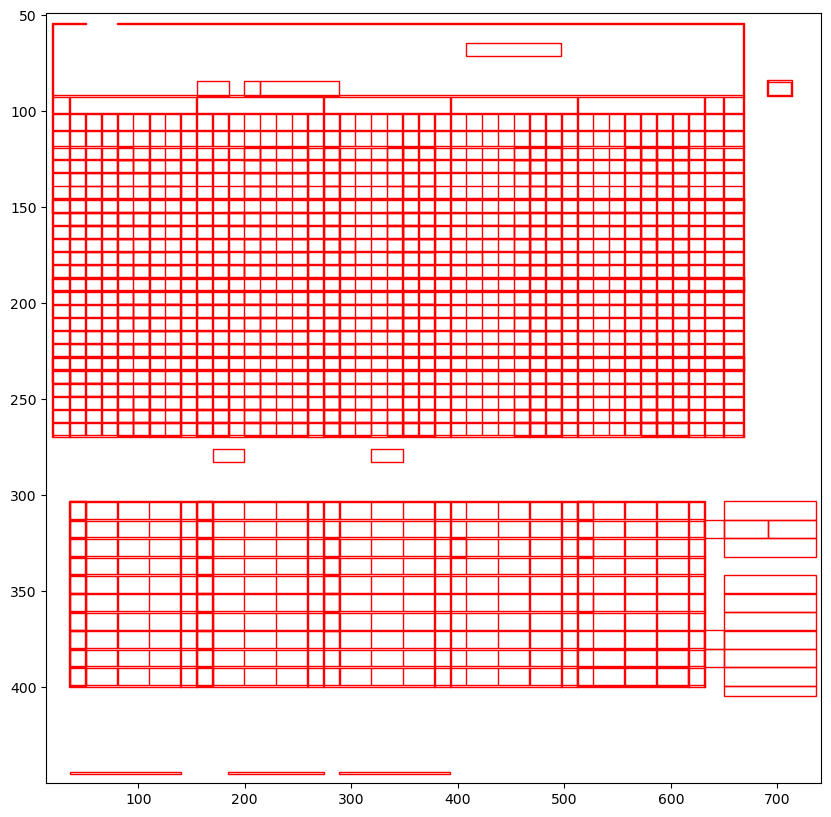

In [158]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 10))

for path in filtered_paths:
    for item in path["items"]:
        if item[0] == "re":
            rect = item[1]
            if isinstance(rect, fitz.Rect):
                # Create a rectangle patch
                patch = patches.Rectangle((rect.x0, rect.y0), rect.width, rect.height, linewidth=1, edgecolor='r', facecolor='none')

                # Add the patch to the Axes
                ax.add_patch(patch)

# Set limits to show all rectangles
ax.set_xlim(min([path["items"][0][1].x0 for path in filtered_paths]) - 5, max([path["items"][0][1].x1 for path in filtered_paths]) + 5)
ax.set_ylim(min([path["items"][0][1].y0 for path in filtered_paths]) - 5, max([path["items"][0][1].y1 for path in filtered_paths]) + 5)

# Flip the y-axis to match PDF orientation
ax.invert_yaxis()

plt.show()

In [159]:
#Every dic in paths is a drawing. If it's a rectangle = cell, it also extracts whatever text is inside of it and appends it
#to the dic.
#Gets all the words on the page
words = page.get_text("words")  # list of words on page
for path in filtered_paths:
    for item in path["items"]:
        if item[0] == "re":  # If it's a rectangle
            rect = item[1]
            if isinstance(rect, fitz.Rect):  # If the second item is a Rect object
                mywords = [w for w in words if fitz.Rect(w[:4]).intersects(rect)]
                mytext = " ".join(w[4] for w in mywords)
                path["text"] = mytext  # Add the extracted text to the dictionary

filtered_paths

[{'items': [('re',
    Rect(407.80999755859375, 64.32000732421875, 497.2340087890625, 71.280029296875),
    1)],
  'type': 'f',
  'even_odd': True,
  'fill_opacity': 1.0,
  'fill': (1.0, 1.0, 0.0),
  'rect': Rect(407.80999755859375, 64.32000732421875, 497.2340087890625, 71.280029296875),
  'seqno': 0,
  'layer': None,
  'closePath': None,
  'color': None,
  'width': None,
  'lineCap': None,
  'lineJoin': None,
  'dashes': None,
  'stroke_opacity': None,
  'text': 'OMPLAN 1: HJO, HLO, LNG, HEN, CUR'},
 {'items': [('re',
    Rect(154.82000732421875, 84.1199951171875, 184.70001220703125, 92.04000854492188),
    1)],
  'type': 'f',
  'even_odd': True,
  'fill_opacity': 1.0,
  'fill': (0.722000002861023, 0.800000011920929, 0.8939999938011169),
  'rect': Rect(154.82000732421875, 84.1199951171875, 184.70001220703125, 92.04000854492188),
  'seqno': 1,
  'layer': None,
  'closePath': None,
  'color': None,
  'width': None,
  'lineCap': None,
  'lineJoin': None,
  'dashes': None,
  'stroke_opaci

In [160]:
words

[(67.44000244140625,
  51.573028564453125,
  152.4984130859375,
  65.25807189941406,
  'Arbetstidsplanering',
  0,
  0,
  0),
 (155.2672882080078,
  51.573028564453125,
  196.66107177734375,
  65.25807189941406,
  'v313-321',
  0,
  0,
  1),
 (199.39010620117188,
  51.573028564453125,
  240.81378173828125,
  65.25807189941406,
  'v313-321',
  0,
  0,
  2),
 (243.54281616210938,
  51.573028564453125,
  300.6534423828125,
  65.25807189941406,
  'Omplanering',
  0,
  0,
  3),
 (303.4223327636719,
  51.573028564453125,
  317.2268981933594,
  65.25807189941406,
  '1.1',
  0,
  0,
  4),
 (409.010009765625,
  64.2179946899414,
  428.1392517089844,
  70.48343658447266,
  'OMPLAN',
  0,
  1,
  0),
 (429.40234375,
  64.2179946899414,
  433.19171142578125,
  70.48343658447266,
  '1:',
  0,
  1,
  1),
 (434.5505676269531,
  64.2179946899414,
  444.93365478515625,
  70.48343658447266,
  'HJO,',
  0,
  1,
  2),
 (446.2925109863281,
  64.2179946899414,
  456.91729736328125,
  70.48343658447266,
  'HL

In [161]:
#Testing to extract the background color of the text.
for path in paths:
    if 'text' in path and '15' in path['text']:  # If 'text' key exists and contains "15"
        print(path['fill'])  # Print the 'fill' value which is the background color


(0.5730000138282776, 0.8159999847412109, 0.3140000104904175)
(0.5730000138282776, 0.8159999847412109, 0.3140000104904175)
(0.5730000138282776, 0.8159999847412109, 0.3140000104904175)
(1.0, 1.0, 0.6000000238418579)
(0.5730000138282776, 0.8159999847412109, 0.3140000104904175)
(0.5730000138282776, 0.8159999847412109, 0.3140000104904175)
(0.5730000138282776, 0.8159999847412109, 0.3140000104904175)
(1.0, 1.0, 0.6000000238418579)
(0.5730000138282776, 0.8159999847412109, 0.3140000104904175)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)


In [162]:
#Checking if any cells overlapps each other.
overlap_pairs = []
for i in range(len(paths)):
    for j in range(i+1, len(paths)):
        rect1 = paths[i]['rect']
        recto1 = paths[i]
        rect2 = paths[j]['rect']
        recto2 = paths[j]
        if rect1.intersects(rect2):
            overlap_pairs.append((rect1, rect2))
if overlap_pairs:
    print(len(overlap_pairs))
    print("Overlapping rectangles found:", overlap_pairs)
else:
    print("No overlapping rectangles found.")


2702
Overlapping rectangles found: [(Rect(154.82000732421875, 84.1199951171875, 184.70001220703125, 92.04000854492188), Rect(19.559999465942383, 91.56002807617188, 668.5, 92.4000244140625)), (Rect(199.4600067138672, 84.1199951171875, 214.4600067138672, 92.04000854492188), Rect(214.33999633789062, 84.1199951171875, 288.8840026855469, 92.04000854492188)), (Rect(199.4600067138672, 84.1199951171875, 214.4600067138672, 92.04000854492188), Rect(19.559999465942383, 91.56002807617188, 668.5, 92.4000244140625)), (Rect(214.33999633789062, 84.1199951171875, 288.8840026855469, 92.04000854492188), Rect(19.559999465942383, 91.56002807617188, 668.5, 92.4000244140625)), (Rect(80.4000015258789, 118.34002685546875, 95.4000015258789, 125.30001831054688), Rect(80.4000015258789, 125.18002319335938, 95.4000015258789, 132.1400146484375)), (Rect(80.4000015258789, 118.34002685546875, 95.4000015258789, 125.30001831054688), Rect(95.27999877929688, 125.18002319335938, 110.30400085449219, 132.1400146484375)), (Rec

In [163]:
overlap_pairs_sign = []
for path in filtered_paths:
    if 'text' in path and 'HÖM' in path['text']:  # If 'text' key exists and contains "HÖM"
        print(path)


{'items': [('re', Rect(19.559999465942383, 172.82000732421875, 35.400001525878906, 173.30001831054688), 1)], 'type': 'f', 'even_odd': True, 'fill_opacity': 1.0, 'fill': (0.0, 0.0, 0.0), 'rect': Rect(19.559999465942383, 172.82000732421875, 35.400001525878906, 173.30001831054688), 'seqno': 1408, 'layer': None, 'closePath': None, 'color': None, 'width': None, 'lineCap': None, 'lineJoin': None, 'dashes': None, 'stroke_opacity': None, 'text': 'DOF HÖM'}
{'items': [('re', Rect(19.559999465942383, 179.66000366210938, 35.400001525878906, 180.1400146484375), 1)], 'type': 'f', 'even_odd': True, 'fill_opacity': 1.0, 'fill': (0.0, 0.0, 0.0), 'rect': Rect(19.559999465942383, 179.66000366210938, 35.400001525878906, 180.1400146484375), 'seqno': 1425, 'layer': None, 'closePath': None, 'color': None, 'width': None, 'lineCap': None, 'lineJoin': None, 'dashes': None, 'stroke_opacity': None, 'text': 'HÖM CUR'}


In [164]:
# First, find the coordinates of the word 'HÖM'
hom_coords = None
for w in words:
    if w[4] == 'HÖM':
        hom_coords = fitz.Rect(w[:4])
        break

if hom_coords is None:
    print("The word 'HÖM' was not found on the page.")
else:
    # Now, find all rectangles intersecting with those coordinates
    intersecting_rects = []
    for path in paths:
        for item in path["items"]:
            if item[0] == "re":  # If it's a rectangle
                rect = item[1]
                if isinstance(rect, fitz.Rect):  # If the second item is a Rect object
                    if rect.intersects(hom_coords):  # If the rectangles intersect
                        intersecting_rects.append(rect)

    # Print all intersecting rectangles
    print(f'HÖM coordinates: {hom_coords}')
    print("Intersecting rectangles:")
    for rect in intersecting_rects:
        print(rect)


# First, find the coordinates of the word 'HÖM'
dof_coords = None
for w in words:
    if w[4] == 'DOF':
        dof_coords = fitz.Rect(w[:4])
        break

if dof_coords is None:
    print("The word 'DOF' was not found on the page.")
else:
    # Now, find all rectangles intersecting with those coordinates
    intersecting_rects = []
    for path in paths:
        for item in path["items"]:
            if item[0] == "re":  # If it's a rectangle
                rect = item[1]
                if isinstance(rect, fitz.Rect):  # If the second item is a Rect object
                    if rect.intersects(dof_coords):  # If the rectangles intersect
                        intersecting_rects.append(rect)

    # Print all intersecting rectangles
    print(f'DOF coordinates: {dof_coords}')
    print("Intersecting rectangles:")
    for rect in intersecting_rects:
        print(rect)

# First, find the coordinates of the word 'CUR'
cur_coords = None
for w in words:
    if w[4] == 'CUR':
        cur_coords = fitz.Rect(w[:4])


if cur_coords is None:
    print("The word 'CUR' was not found on the page.")
else:
    # Now, find all rectangles intersecting with those coordinates
    intersecting_rects = []
    for path in paths:
        for item in path["items"]:
            if item[0] == "re":  # If it's a rectangle
                rect = item[1]
                if isinstance(rect, fitz.Rect):  # If the second item is a Rect object
                    if rect.intersects(cur_coords):  # If the rectangles intersect
                        intersecting_rects.append(rect)

    # Print all intersecting rectangles
    print(f'CUR coordinates: {cur_coords}')
    print("Intersecting rectangles:")
    for rect in intersecting_rects:
        print(rect)

HÖM coordinates: Rect(20.399999618530273, 172.56202697753906, 32.93880081176758, 179.99783325195312)
Intersecting rectangles:
Rect(19.559999465942383, 172.82000732421875, 35.400001525878906, 173.30001831054688)
Rect(19.559999465942383, 179.66000366210938, 35.400001525878906, 180.1400146484375)
DOF coordinates: Rect(20.399999618530273, 165.7220001220703, 31.739999771118164, 173.15780639648438)
Intersecting rectangles:
Rect(19.559999465942383, 165.98001098632812, 35.400001525878906, 166.46002197265625)
Rect(19.559999465942383, 172.82000732421875, 35.400001525878906, 173.30001831054688)
CUR coordinates: Rect(20.399999618530273, 179.4020233154297, 31.97879981994629, 186.83782958984375)
Intersecting rectangles:
Rect(19.079999923706055, 186.74002075195312, 668.1400146484375, 193.70001220703125)
Rect(19.559999465942383, 179.66000366210938, 35.400001525878906, 180.1400146484375)
Rect(19.559999465942383, 186.3800048828125, 668.5, 187.22000122070312)


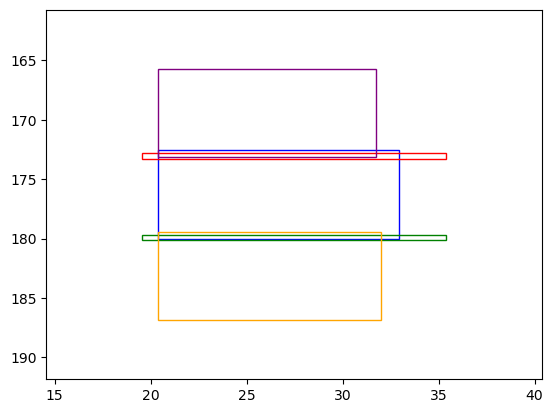

In [165]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()

# Word "HÖM" coordinates
hom_rect = (20.399999618530273, 172.56202697753906, 32.93880081176758, 179.99783325195312)
ax.add_patch(patches.Rectangle((hom_rect[0], hom_rect[1]),   # Bottom-left corner
                               hom_rect[2] - hom_rect[0],   # Width
                               hom_rect[3] - hom_rect[1],   # Height
                               fill=False,
                               edgecolor='blue'))

# First intersecting rectangle coordinates for "HÖM"
rect1 = (19.559999465942383, 172.82000732421875, 35.400001525878906, 173.30001831054688)
ax.add_patch(patches.Rectangle((rect1[0], rect1[1]),
                               rect1[2] - rect1[0],
                               rect1[3] - rect1[1],
                               fill=False,
                               edgecolor='red'))

# Second intersecting rectangle coordinates for "HÖM"
rect2 = (19.559999465942383, 179.66000366210938, 35.400001525878906, 180.1400146484375)
ax.add_patch(patches.Rectangle((rect2[0], rect2[1]),
                               rect2[2] - rect2[0],
                               rect2[3] - rect2[1],
                               fill=False,
                               edgecolor='green'))

# Word "DOF" coordinates
dof_rect = (20.399999618530273, 165.7220001220703, 31.739999771118164, 173.15780639648438)
ax.add_patch(patches.Rectangle((dof_rect[0], dof_rect[1]),
                               dof_rect[2] - dof_rect[0],
                               dof_rect[3] - dof_rect[1],
                               fill=False,
                               edgecolor='purple'))

# Word "CUR" coordinates
cur_rect = (20.399999618530273, 179.4020233154297, 31.97879981994629, 186.83782958984375)
ax.add_patch(patches.Rectangle((cur_rect[0], cur_rect[1]),
                               cur_rect[2] - cur_rect[0],
                               cur_rect[3] - cur_rect[1],
                               fill=False,
                               edgecolor='orange'))

# Set plot limits to fit all rectangles with a margin of 5
x_min = min(hom_rect[0], rect1[0], rect2[0], dof_rect[0], cur_rect[0]) - 5
y_min = min(hom_rect[1], rect1[1], rect2[1], dof_rect[1], cur_rect[1]) - 5
x_max = max(hom_rect[2], rect1[2], rect2[2], dof_rect[2], cur_rect[2]) + 5
y_max = max(hom_rect[3], rect1[3], rect2[3], dof_rect[3], cur_rect[3]) + 5
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Reverse the y-axis so that the plot corresponds to the PDF's layout (origin at the top left)
ax.invert_yaxis()

plt.show()


In [166]:
#Making a list of dictionarys on the same line = the same y-coordinates
def get_words_to_right(sign, words, tolerance=2.5):
    # Get the coordinates of the signature
    sign_coord = None
    for word in words:
        if word[4] == sign:
            sign_coord = fitz.Rect(word[:4])
            break

    if sign_coord is None:
        return None

    # Find all words to the right of the signature
    words_to_right = []
    for word in words:
        word_coord = fitz.Rect(word[:4])
        # Check if the word is to the right of the signature and shares the same y-coordinate within a tolerance
        if word_coord.x0 > sign_coord.x1 and abs(word_coord.y0 - sign_coord.y0) < tolerance:
            words_to_right.append((word[4], word_coord))

    return words_to_right

sign = 'DOF'
words_right_of_sign = get_words_to_right(sign, words)
words_right_of_sign

[('9',
  Rect(42.36000061035156, 167.07801818847656, 44.89535903930664, 173.34344482421875)),
 ('9',
  Rect(57.2400016784668, 167.07801818847656, 59.775360107421875, 173.34344482421875)),
 ('9',
  Rect(72.12000274658203, 167.07801818847656, 74.65536499023438, 173.34344482421875)),
 ('20',
  Rect(85.80000305175781, 167.07801818847656, 90.8553237915039, 173.34344482421875)),
 ('0',
  Rect(101.9000015258789, 167.07801818847656, 104.43536376953125, 173.34344482421875)),
 ('40:00',
  Rect(143.3000030517578, 168.11001586914062, 152.37559509277344, 173.05641174316406)),
 ('9',
  Rect(161.4199981689453, 167.07801818847656, 163.95535278320312, 173.34344482421875)),
 ('9',
  Rect(176.3000030517578, 167.07801818847656, 178.83535766601562, 173.34344482421875)),
 ('9',
  Rect(191.17999267578125, 167.07801818847656, 193.71534729003906, 173.34344482421875)),
 ('0',
  Rect(206.05999755859375, 167.07801818847656, 208.59535217285156, 173.34344482421875)),
 ('27:00',
  Rect(262.3399963378906, 168.1100158

In [167]:
def is_one_or_two_chars(word_info):
    word, _ = word_info
    return len(word) <= 2

filtered_signature_info = list(filter(is_one_or_two_chars, words_right_of_sign))
filtered_signature_info

[('9',
  Rect(42.36000061035156, 167.07801818847656, 44.89535903930664, 173.34344482421875)),
 ('9',
  Rect(57.2400016784668, 167.07801818847656, 59.775360107421875, 173.34344482421875)),
 ('9',
  Rect(72.12000274658203, 167.07801818847656, 74.65536499023438, 173.34344482421875)),
 ('20',
  Rect(85.80000305175781, 167.07801818847656, 90.8553237915039, 173.34344482421875)),
 ('0',
  Rect(101.9000015258789, 167.07801818847656, 104.43536376953125, 173.34344482421875)),
 ('9',
  Rect(161.4199981689453, 167.07801818847656, 163.95535278320312, 173.34344482421875)),
 ('9',
  Rect(176.3000030517578, 167.07801818847656, 178.83535766601562, 173.34344482421875)),
 ('9',
  Rect(191.17999267578125, 167.07801818847656, 193.71534729003906, 173.34344482421875)),
 ('0',
  Rect(206.05999755859375, 167.07801818847656, 208.59535217285156, 173.34344482421875)),
 ('5',
  Rect(295.3699951171875, 167.07801818847656, 297.9053649902344, 173.34344482421875)),
 ('9',
  Rect(310.25, 167.07801818847656, 312.7853698

In [168]:
#Extracting all the dates
import re
def is_date_format(cell):
    if cell is None:
        return False
    date_pattern = re.compile(r'\d{1,2}-[a-zA-Z]{3}')
    return bool(date_pattern.match(cell))

def get_dates(words):
    # Find all words that match the date format
    dates = []
    for word in words:
        if is_date_format(word[4]):
            dates.append((word[4], fitz.Rect(word[:4])))
    return dates

dates = get_dates(words)
dates

[('27-mar',
  Rect(37.91999816894531, 113.03002166748047, 49.313987731933594, 117.97642517089844)),
 ('28-mar',
  Rect(52.79999923706055, 113.03002166748047, 64.1939926147461, 117.97642517089844)),
 ('29-mar',
  Rect(67.68000030517578, 113.03002166748047, 79.07401275634766, 117.97642517089844)),
 ('30-mar',
  Rect(82.55999755859375, 113.03002166748047, 93.95401000976562, 117.97642517089844)),
 ('31-mar',
  Rect(97.44000244140625, 113.03002166748047, 108.83401489257812, 117.97642517089844)),
 ('01-apr',
  Rect(112.81999969482422, 113.03002166748047, 123.25281524658203, 117.97642517089844)),
 ('02-apr',
  Rect(127.69999694824219, 113.03002166748047, 138.1328125, 117.97642517089844)),
 ('03-apr',
  Rect(157.4600067138672, 113.03002166748047, 167.892822265625, 117.97642517089844)),
 ('04-apr',
  Rect(172.33999633789062, 113.03002166748047, 182.77281188964844, 117.97642517089844)),
 ('05-apr',
  Rect(187.22000122070312, 113.03002166748047, 197.65281677246094, 117.97642517089844)),
 ('06-apr

In [169]:
def create_work_shifts(signature_info, dates_info):
    work_shifts = []
    for date_word, date_rect in dates_info:
        date_line_x = (date_rect.x0 + date_rect.x1) / 2  # Compute center x-coordinate of the date rectangle
        for word, word_rect in signature_info:
            # If date_line_x is within the x boundaries of the word rectangle
            if word_rect.x0 <= date_line_x <= word_rect.x1:
                work_shift = {'date': date_word, 'work_hours': word, 'word_rect' : word_rect}
                work_shifts.append(work_shift)
                break  # Exit the inner loop as soon as a match is found
    return work_shifts

# Transform words list
#transformed_words = [(word_info[4], fitz.Rect(word_info[:4])) for word_info in words]

work_shifts = create_work_shifts(words_right_of_sign, dates)
work_shifts

[{'date': '27-mar',
  'work_hours': '9',
  'word_rect': Rect(42.36000061035156, 167.07801818847656, 44.89535903930664, 173.34344482421875)},
 {'date': '28-mar',
  'work_hours': '9',
  'word_rect': Rect(57.2400016784668, 167.07801818847656, 59.775360107421875, 173.34344482421875)},
 {'date': '29-mar',
  'work_hours': '9',
  'word_rect': Rect(72.12000274658203, 167.07801818847656, 74.65536499023438, 173.34344482421875)},
 {'date': '30-mar',
  'work_hours': '20',
  'word_rect': Rect(85.80000305175781, 167.07801818847656, 90.8553237915039, 173.34344482421875)},
 {'date': '31-mar',
  'work_hours': '0',
  'word_rect': Rect(101.9000015258789, 167.07801818847656, 104.43536376953125, 173.34344482421875)},
 {'date': '03-apr',
  'work_hours': '9',
  'word_rect': Rect(161.4199981689453, 167.07801818847656, 163.95535278320312, 173.34344482421875)},
 {'date': '04-apr',
  'work_hours': '9',
  'word_rect': Rect(176.3000030517578, 167.07801818847656, 178.83535766601562, 173.34344482421875)},
 {'date': 

In [170]:
filtered_paths

[{'items': [('re',
    Rect(407.80999755859375, 64.32000732421875, 497.2340087890625, 71.280029296875),
    1)],
  'type': 'f',
  'even_odd': True,
  'fill_opacity': 1.0,
  'fill': (1.0, 1.0, 0.0),
  'rect': Rect(407.80999755859375, 64.32000732421875, 497.2340087890625, 71.280029296875),
  'seqno': 0,
  'layer': None,
  'closePath': None,
  'color': None,
  'width': None,
  'lineCap': None,
  'lineJoin': None,
  'dashes': None,
  'stroke_opacity': None,
  'text': 'OMPLAN 1: HJO, HLO, LNG, HEN, CUR'},
 {'items': [('re',
    Rect(154.82000732421875, 84.1199951171875, 184.70001220703125, 92.04000854492188),
    1)],
  'type': 'f',
  'even_odd': True,
  'fill_opacity': 1.0,
  'fill': (0.722000002861023, 0.800000011920929, 0.8939999938011169),
  'rect': Rect(154.82000732421875, 84.1199951171875, 184.70001220703125, 92.04000854492188),
  'seqno': 1,
  'layer': None,
  'closePath': None,
  'color': None,
  'width': None,
  'lineCap': None,
  'lineJoin': None,
  'dashes': None,
  'stroke_opaci

In [171]:
def get_rect_containing_point(filtered_paths, point):
    rect_containing_point = []
    for path in filtered_paths:
        if 'rect' in path and path['rect'].contains(point):
            rect_containing_point.append(path)
        if 'items' in path:
            for item in path['items']:
                if isinstance(item, tuple) and len(item) > 1 and item[1].contains(point):
                    rect_containing_point.append(path)
    return rect_containing_point


In [177]:
#30 mars. grå
word_rect = fitz.Rect(85.80000305175781, 167.07801818847656, 90.8553237915039, 173.34344482421875)  # Assume this is the word rectangle
center_point = fitz.Point((word_rect.x0 + word_rect.x1) / 2, (word_rect.y0 + word_rect.y1) / 2)

rectangles = get_rect_containing_point(filtered_paths, center_point)
print(len(rectangles))
print(rectangles)

2
[{'items': [('re', Rect(80.4000015258789, 166.22003173828125, 95.4000015258789, 173.18002319335938), 1)], 'type': 'f', 'even_odd': True, 'fill_opacity': 1.0, 'fill': (0.7093919515609741, 0.7094987630844116, 0.7093766927719116), 'rect': Rect(80.4000015258789, 166.22003173828125, 95.4000015258789, 173.18002319335938), 'seqno': 77, 'layer': None, 'closePath': None, 'color': None, 'width': None, 'lineCap': None, 'lineJoin': None, 'dashes': None, 'stroke_opacity': None, 'text': '0 20'}, {'items': [('re', Rect(80.4000015258789, 166.22003173828125, 95.4000015258789, 173.18002319335938), 1)], 'type': 'f', 'even_odd': True, 'fill_opacity': 1.0, 'fill': (0.7093919515609741, 0.7094987630844116, 0.7093766927719116), 'rect': Rect(80.4000015258789, 166.22003173828125, 95.4000015258789, 173.18002319335938), 'seqno': 77, 'layer': None, 'closePath': None, 'color': None, 'width': None, 'lineCap': None, 'lineJoin': None, 'dashes': None, 'stroke_opacity': None, 'text': '0 20'}]


In [175]:
#This code only adds color if there is a color other than white. That is because there is only a rectangle in the area of the
#word if there is a color around it. Why? THats probably how fitz coded it.

for shift in work_shifts:
    word_rect = shift['word_rect']
    center_point = fitz.Point((word_rect.x0 + word_rect.x1) / 2, (word_rect.y0 + word_rect.y1) / 2)
    rectangles = get_rect_containing_point(filtered_paths, center_point)

    if rectangles:  # Check that there is at least one rectangle in the list
        shift['background_color'] = rectangles[0]['fill']
    else:
        shift['background_color'] = None  # Assign None if no rectangles found

work_shifts

[{'date': '27-mar',
  'work_hours': '9',
  'word_rect': Rect(42.36000061035156, 167.07801818847656, 44.89535903930664, 173.34344482421875),
  'background_color': None},
 {'date': '28-mar',
  'work_hours': '9',
  'word_rect': Rect(57.2400016784668, 167.07801818847656, 59.775360107421875, 173.34344482421875),
  'background_color': None},
 {'date': '29-mar',
  'work_hours': '9',
  'word_rect': Rect(72.12000274658203, 167.07801818847656, 74.65536499023438, 173.34344482421875),
  'background_color': None},
 {'date': '30-mar',
  'work_hours': '20',
  'word_rect': Rect(85.80000305175781, 167.07801818847656, 90.8553237915039, 173.34344482421875),
  'background_color': (0.7093919515609741,
   0.7094987630844116,
   0.7093766927719116)},
 {'date': '31-mar',
  'work_hours': '0',
  'word_rect': Rect(101.9000015258789, 167.07801818847656, 104.43536376953125, 173.34344482421875),
  'background_color': None},
 {'date': '03-apr',
  'work_hours': '9',
  'word_rect': Rect(161.4199981689453, 167.07801818

In [173]:
#Makes a pdf with the graphic extracted for visual comparison.
outpdf = fitz.open()
outpage = outpdf.new_page(width=page.rect.width, height=page.rect.height)
shape = outpage.new_shape()  # make a drawing canvas for the output page
# --------------------------------------
# loop through the paths and draw them
# --------------------------------------
for path in paths:
    # ------------------------------------
    # draw each entry of the 'items' list
    # ------------------------------------
    for item in path["items"]:  # these are the draw commands
        if item[0] == "l":  # line
            shape.draw_line(item[1], item[2])
        elif item[0] == "re":  # rectangle
            shape.draw_rect(item[1])
        elif item[0] == "qu":  # quad
            shape.draw_quad(item[1])
        elif item[0] == "c":  # curve
            shape.draw_bezier(item[1], item[2], item[3], item[4])
        else:
            raise ValueError("unhandled drawing", item)
    # ------------------------------------------------------
    # all items are drawn, now apply the common properties
    # to finish the path
    # ------------------------------------------------------

    stroke_opacity = 1
    fill_opacity = 1

    shape.finish(
        fill=path.get("fill", (1.0, 1.0, 0.0)),  # fill color
        color=path.get("color", 1),  # line color
        #dashes=path.get("dashes"),  # line dashing
        even_odd=path.get("even_odd", True),  # control color of overlaps
        closePath=path.get("closePath"),  # whether to connect last and first point

        #lineCap=path.get("lineCap", default_value),  # how line ends should look like
        width=path.get("width"),  # line width
        stroke_opacity=stroke_opacity,
        fill_opacity=fill_opacity
    )

# all paths processed - commit the shape to its page
shape.commit()
outpdf.save("drawings-page-0.pdf")